In [1]:
import numpy as np
import lbg_forecast.dust_priors as dpr
import lbg_forecast.sfh as sfh
import lbg_forecast.population_model as pop
import matplotlib.pyplot as plt
import lbg_forecast.priors_gp as gp

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


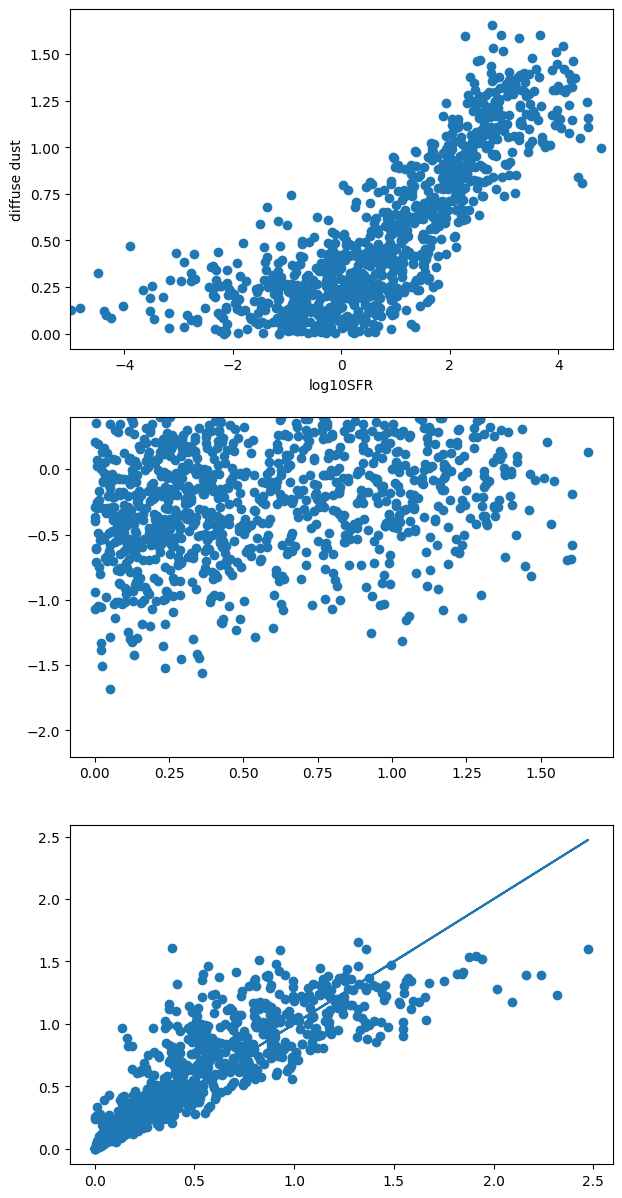

In [2]:
diffuse_dust_prior = gp.DiffuseDustPrior()
index_prior = gp.DustIndexPrior()

fig, ax = plt.subplots(ncols=1, nrows=3, figsize=(7, 15))
ax1 = ax[0]
ax2 = ax[1]
ax3 = ax[2]

nsamples = 1000
redshift = np.random.uniform(0, 7, nsamples)
logmass = np.random.uniform(7, 13, nsamples)
logsfrratios = pop.modified_prospector_beta_sfh_prior(redshift, logmass, 0.3)
dust_index, dust1, dust2, recent_sfrs = dpr.sample_dust_model(redshift, logmass, logsfrratios, True)

ax1.scatter(recent_sfrs, dust2)
ax1.set_xlim(-5.0, 5.0)
ax1.set_ylabel("diffuse dust")
ax1.set_xlabel("log10SFR")

ax2.scatter(dust2, dust_index)
ax2.set_ylim(-2.2, 0.4)

ax3.scatter(dust1, dust2)
ax3.plot(dust1, dust1)

In [3]:
np.atleast_2d(logsfrratios[0, :])

array([[-0.29662955,  0.0872713 , -0.17645629, -0.473419  ,  0.8446953 ,
         0.79087398]])

In [4]:
nsamples=10000
redshift = np.random.uniform(0, 2, nsamples)
mass = np.random.uniform(7, 13, nsamples)
log_sfr_ratios = np.random.uniform(-5, 5, (nsamples, 6))